In [41]:
import pandas as pd

In [42]:
data=pd.read_csv('pps_data.csv',index_col=0)
target=pd.read_csv('pps_target.csv',index_col=0)
sample_submission=pd.read_csv('sample_submission_raw.csv',index_col=0)

In [43]:
data.index = pd.to_datetime(data.index,format='%Y-%m-%d')
target.index = pd.to_datetime(target.index,format='%Y-%m-%d')

In [44]:
data_mms=data.copy()

In [45]:
df_2018_raw = data[data.index.year == 2018]
df_2019_raw = data[data.index.year == 2019]
df_2020_raw = data[data.index.year == 2020]
df_2021_raw = data[data.index.year == 2021]

In [46]:
from sklearn.preprocessing import MinMaxScaler
mms_2018 = MinMaxScaler()
mms_2019 = MinMaxScaler()
mms_2020 = MinMaxScaler()
mms_2021 = MinMaxScaler()


df_2018_raw.iloc[:,:4] = mms_2018.fit_transform(df_2018_raw.iloc[:,:4])
df_2019_raw.iloc[:,:4] = mms_2019.fit_transform(df_2019_raw.iloc[:,:4])
df_2020_raw.iloc[:,:4] = mms_2020.fit_transform(df_2020_raw.iloc[:,:4])
df_2021_raw.iloc[:,:4] = mms_2021.fit_transform(df_2021_raw.iloc[:,:4])

/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_18553/2030361634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_raw.iloc[:,:4] = mms_2018.fit_transform(df_2018_raw.iloc[:,:4])
/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_18553/2030361634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_raw.iloc[:,:4] = mms_2019.fit_transform(df_2019_raw.iloc[:,:4])
/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_18553/2030361634.py:10: SettingWithCopyWarning: 
A va

In [47]:
df_2018_week_mean=df_2018_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2019_week_mean=df_2019_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2020_week_mean=df_2020_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2021_week_mean=df_2021_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()

In [48]:
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,2]],df_2019_week_mean.iloc[:,[0,1,2]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,2]],df_2021_week_mean.iloc[:,[0,1,2]],on=['주','주말평일'])
result_1=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [49]:
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,3]],df_2019_week_mean.iloc[:,[0,1,3]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,3]],df_2021_week_mean.iloc[:,[0,1,3]],on=['주','주말평일'])
result_2=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [50]:
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,4]],df_2019_week_mean.iloc[:,[0,1,4]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,4]],df_2021_week_mean.iloc[:,[0,1,4]],on=['주','주말평일'])
result_3=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [51]:
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,5]],df_2019_week_mean.iloc[:,[0,1,5]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,5]],df_2021_week_mean.iloc[:,[0,1,5]],on=['주','주말평일'])
result_4=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [52]:
result_1

,주,주말평일,광진구_x_x,광진구_y_x,광진구_x_y,광진구_y_y
0,1,주말,0.053458,0.106525,0.206283,0.043940
1,1,평일,0.092121,0.166236,0.265149,0.109433
2,2,주말,0.040793,0.135649,0.202795,0.106087
3,2,평일,0.051469,0.162591,0.174121,0.128487
4,3,주말,0.066783,0.132767,0.199364,0.273314
...,...,...,...,...,...,...
98,50,주말,0.149184,0.287884,0.209993,0.117106
99,50,평일,0.227133,0.321788,0.392735,0.362214
100,51,주말,0.190559,0.227301,0.189571,0.099637
101,51,평일,0.277343,0.320417,0.222765,0.382370


In [53]:
result_1['mean_광진구'] = result_1.iloc[:,2:].mean(axis=1)
result_2['mean_동대문구'] = result_2.iloc[:,2:].mean(axis=1)
result_3['mean_성동구'] = result_3.iloc[:,2:].mean(axis=1)
result_4['mean_중랑구'] = result_4.iloc[:,2:].mean(axis=1)

In [54]:
result=pd.concat([result_1.loc[:,['주','주말평일','mean_광진구']],result_2.loc[:,['주','주말평일','mean_동대문구']],result_3.loc[:,['주','주말평일','mean_성동구']],result_4.loc[:,['주','주말평일','mean_중랑구']]],axis=1)
result=result.iloc[:,[0,1,2,5,8,11]]
result

,주,주말평일,mean_광진구,mean_동대문구,mean_성동구,mean_중랑구
0,1,주말,0.102551,0.110144,0.090020,0.097063
1,1,평일,0.158235,0.169216,0.167271,0.144972
2,2,주말,0.121331,0.127660,0.105426,0.121485
3,2,평일,0.129167,0.136421,0.141860,0.118142
4,3,주말,0.168057,0.165944,0.164965,0.165005
...,...,...,...,...,...,...
98,50,주말,0.191042,0.225049,0.173257,0.217099
99,50,평일,0.325968,0.379592,0.318696,0.337889
100,51,주말,0.176767,0.203315,0.149763,0.204617
101,51,평일,0.300724,0.352451,0.307887,0.318637


In [55]:
df_2018_raw = data[data.index.year == 2018]
df_2019_raw = data[data.index.year == 2019]
df_2020_raw = data[data.index.year == 2020]
df_2021_raw = data[data.index.year == 2021]

In [56]:
df_2018_week_mean=df_2018_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2019_week_mean=df_2019_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2020_week_mean=df_2020_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2021_week_mean=df_2021_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()

In [57]:
from sklearn.preprocessing import MinMaxScaler

mms1 = MinMaxScaler()
mms1.fit(df_2018_week_mean.iloc[:,2:])

mms2 = MinMaxScaler()
mms2.fit(df_2019_week_mean.iloc[:,2:])

mms3 = MinMaxScaler()
mms3.fit(df_2020_week_mean.iloc[:,2:])

mms4 = MinMaxScaler()
mms4.fit(df_2021_week_mean.iloc[:,2:])

MinMaxScaler()

In [58]:
result_temp1 = result.copy()
result_temp1.iloc[:,2:] = mms1.inverse_transform(result_temp1.iloc[:,2:].values)
result_temp2 = result.copy()
result_temp2.iloc[:,2:] = mms2.inverse_transform(result_temp2.iloc[:,2:].values)
result_temp3 = result.copy()
result_temp3.iloc[:,2:] = mms3.inverse_transform(result_temp3.iloc[:,2:].values)
result_temp4 = result.copy()
result_temp4.iloc[:,2:] = mms4.inverse_transform(result_temp4.iloc[:,2:].values)

In [59]:
a=(result_temp2.groupby(['주','주말평일']).mean()/result_temp1.groupby(['주','주말평일']).mean()).reset_index()
b=(result_temp3.groupby(['주','주말평일']).mean()/result_temp2.groupby(['주','주말평일']).mean()).reset_index()
c=(result_temp4.groupby(['주','주말평일']).mean()/result_temp3.groupby(['주','주말평일']).mean()).reset_index()

In [60]:
a.columns = ['주','주말평일']+['1_'+str(i) for i in a.columns[2:]]
b.columns = ['주','주말평일']+['2_'+str(i) for i in a.columns[2:]]
c.columns = ['주','주말평일']+['3_'+str(i) for i in a.columns[2:]]

In [62]:
ratio=a.merge(b,on=['주','주말평일']).merge(c,on=['주','주말평일'])

In [70]:
ratio.loc[:,[i for i in ratio.columns if i.endswith('광진구')]]

,1_mean_광진구,2_1_mean_광진구,3_1_mean_광진구
0,1.985938,1.522846,0.717769
1,1.881138,1.357296,0.818447
2,1.942809,1.456879,0.755145
3,1.927543,1.432822,0.769631
4,1.868303,1.335745,0.833389
...,...,...,...
98,1.842421,1.291374,0.865723
99,1.754952,1.131729,1.003031
100,1.857867,1.318002,0.846057
101,1.766143,1.153037,0.982505


In [22]:
a=ratio.loc[:,[i for i in ratio.columns if i.endswith('광진구')]].mean(axis=1)
b=ratio.loc[:,[i for i in ratio.columns if i.endswith('동대문구')]].mean(axis=1)
c=ratio.loc[:,[i for i in ratio.columns if i.endswith('성동구')]].mean(axis=1)
d=ratio.loc[:,[i for i in ratio.columns if i.endswith('중랑구')]].mean(axis=1)

In [23]:
ratio=pd.concat([a,b,c,d],axis=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df_2021_week_mean.iloc[:,2:])

result_temp = result.copy()

result_temp.iloc[:,2:] = mms.inverse_transform(result_temp.iloc[:,2:].values)

result_temp

,주,주말평일,mean_광진구,mean_동대문구,mean_성동구,mean_중랑구
0,1,주말,2.354750,2.081679,1.927279,1.309386
1,1,평일,3.115328,2.676816,2.850890,1.652131
2,2,주말,2.611259,2.258149,2.111478,1.484104
3,2,평일,2.718293,2.346412,2.547078,1.460186
4,3,주말,3.249491,2.643855,2.823316,1.795445
...,...,...,...,...,...,...
98,50,주말,3.563438,3.239325,2.922461,2.168124
99,50,평일,5.406391,4.796311,4.661332,3.032257
100,51,주말,3.368464,3.020358,2.641571,2.078827
101,51,평일,5.061588,4.522870,4.532095,2.894529


In [25]:
# df_2018_week_mean
# df_2019_week_mean
# df_2020_week_mean
# df_2021_week_mean

In [26]:
temp_1=pd.merge(df_2018_raw.reset_index(),df_2019_raw.reset_index(),on=['주','주말평일'])
temp_2=pd.merge(df_2020_raw.reset_index(),df_2021_raw.reset_index(),on=['주','주말평일'])

diff_df=pd.merge(temp_1,temp_2,on=['주','주말평일'])

df_diff_광진구=diff_df.loc[:,[i for i in diff_df.columns if i.startswith('광진구')] + ['주','주말평일']].drop_duplicates(['주','주말평일']).reset_index(drop=True)
df_diff_동대문구=diff_df.loc[:,[i for i in diff_df.columns if i.startswith('동대문구')] + ['주','주말평일']].drop_duplicates(['주','주말평일']).reset_index(drop=True)
df_diff_성동구=diff_df.loc[:,[i for i in diff_df.columns if i.startswith('성동구')] + ['주','주말평일']].drop_duplicates(['주','주말평일']).reset_index(drop=True)
df_diff_중랑구=diff_df.loc[:,[i for i in diff_df.columns if i.startswith('중랑구')] + ['주','주말평일']].drop_duplicates(['주','주말평일']).reset_index(drop=True)

In [27]:
result_main=result_temp.copy()

In [28]:
df_diff_광진구['diff_mean']=df_diff_광진구.iloc[:,:-2].diff(axis=1).fillna(0).mean(axis=1)
result_temp=result_temp.merge(df_diff_광진구.iloc[:,-3:],on=['주','주말평일'])
result_temp['mean_광진구']=result_temp['mean_광진구'] + result_temp['diff_mean']
result_temp.drop('diff_mean',axis=1,inplace=True)

df_diff_동대문구['diff_mean']=df_diff_동대문구.iloc[:,:-2].diff(axis=1).fillna(0).mean(axis=1)
result_temp=result_temp.merge(df_diff_동대문구.iloc[:,-3:],on=['주','주말평일'])
result_temp['mean_동대문구']=result_temp['mean_동대문구'] + result_temp['diff_mean']
result_temp.drop('diff_mean',axis=1,inplace=True)

df_diff_성동구['diff_mean']=df_diff_성동구.iloc[:,:-2].diff(axis=1).fillna(0).mean(axis=1)
result_temp=result_temp.merge(df_diff_성동구.iloc[:,-3:],on=['주','주말평일'])
result_temp['mean_성동구']=result_temp['mean_성동구'] + result_temp['diff_mean']
result_temp.drop('diff_mean',axis=1,inplace=True)

df_diff_중랑구['diff_mean']=df_diff_중랑구.iloc[:,:-2].diff(axis=1).fillna(0).mean(axis=1)
result_temp=result_temp.merge(df_diff_중랑구.iloc[:,-3:],on=['주','주말평일'])
result_temp['mean_중랑구']=result_temp['mean_중랑구'] + result_temp['diff_mean']
result_temp.drop('diff_mean',axis=1,inplace=True)

In [39]:
ratio.mean()

0    1.295437
1    1.442424
2    1.290464
3    1.465848
dtype: float64

In [29]:
result_temp.iloc[:,2:]=result_temp.iloc[:,2:]*ratio.values

In [30]:
main=target.merge(result_temp,on=['주','주말평일']).iloc[:,-4:]

In [31]:
import numpy as np
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [36]:
for col in main.columns:
    main[col] = smooth(main[col],5)

In [33]:
sample_submission.iloc[:,1:] = (main.values)

<AxesSubplot: >

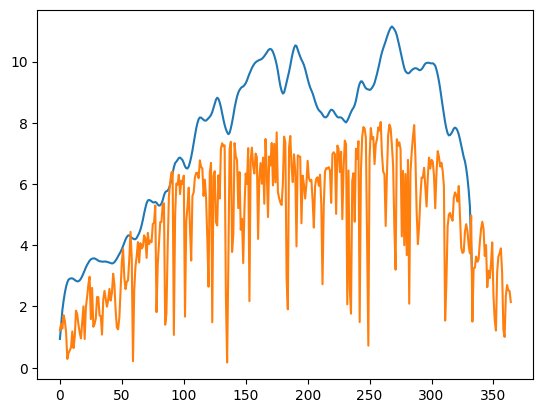

In [37]:
(main.iloc[:,3]).plot()
df_2021_raw.iloc[:,3].reset_index(drop=True).plot()

<AxesSubplot: >

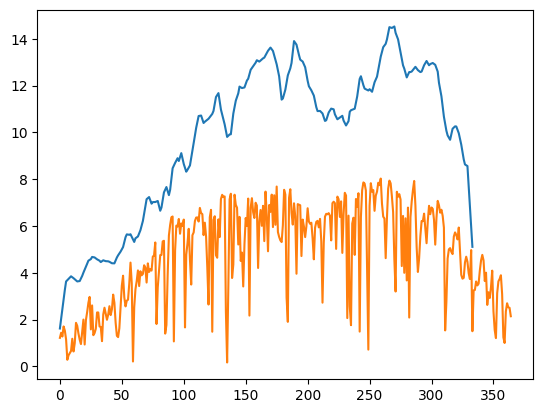

In [82]:
(main.iloc[:,3]*1.3).plot()
df_2021_raw.iloc[:,3].reset_index(drop=True).plot()